# Overview

The company is diversifying its portfolio by entering the aviation industry. Specifically, they aim to purchase and operate airplanes for both commercial and private purposes. However, they lack expertise regarding the risks associated with different aircraft models.

# Business Problem

The company is expanding into the aviation industry and requires data-driven insights to determine which aircraft models pose the lowest risk for commercial and private operations. Your role is to evaluate historical data on aircraft safety and performance under varying conditions. The goal is to provide actionable recommendations that help the company select the safest aircraft models for their new business venture.

# Data Understanding

The dataset contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

In [1]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data into a dataframe
df = pd.read_csv('./Data/AviationData.csv',encoding='ISO-8859-1',low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Checking the overall data of our dataset looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
# Getting some statistical measures about the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
# Checking for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

# Data Cleaning

Making the data easier to work with by dropping rows with null values in the 'Model' and 'Make' columns since those are the two rows we are interested in.

In [6]:
# Dropping rows with null values in the 'Model' column
df.dropna(subset=['Model','Make'],axis=0,inplace=True)

In [7]:
# Dropping unneccessary columns that we will not be using
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Schedule','Air.carrier']
df.drop(columns=columns_to_drop,inplace=True)

Converting the eventdate column to date and time so that we can extract the month and making it easier to work with later on. Also creating a season column for later

In [8]:
#Converting the 'Event.Date' column to date and time data type for ease of working with it
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [9]:
# Extracting the months from the 'Event.Date' column
df['Month'] = df['Event.Date'].dt.month
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12


In [10]:
# Creating a column called 'Season' by mapping the seasons to the months
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,10,Fall
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,7,Summer
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,8,Summer
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,6,Summer
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,8,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter


In [11]:
# Renaming the 'Month' column to its respective month name
df['Month'] = df['Month'].map({
    1: 'January', 2: 'February',
    3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August',
    9: 'September' , 10: 'October', 11: 'November', 
    12: 'December' 
})
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,October,Fall
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,July,Summer
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,August,Summer
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,June,Summer
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,August,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,December,Winter
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,December,Winter
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,December,Winter
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,December,Winter


The weather condition column has two values that are similar but spelled differently hence the need to make the values to be spelled similarly for ease of manipulation

In [12]:
# The Weather condition column has two categorical values that represent the same thing
df['Weather.Condition'] = df['Weather.Condition'].replace({'Unk':'UNK',})

In [13]:
# Saving the cleaned dataframe to a csv file
df.to_csv('./Data/Cleaned_AviationData.csv')

## Aircrafts with lowest frequency

Some aircrafts have lower accident frequencies than others hence the need to identify the aircrafts with the least accident frequencies

In [14]:
# Grouping by Model to see which models have more accidents
accidents = df.groupby(['Aircraft.Category','Make','Model'])['Event.Id'].count().sort_values(ascending=True).head(50)
accidents

Aircraft.Category  Make                            Model               
Airplane           177MF LLC                       PITTS MODEL 12          1
                   Pitts                           S1C                     1
                                                   S1S                     1
                                                   S2S                     1
                                                   SC 1                    1
                                                   SPECIAL 51C             1
                   Pitts Special                   S-1C                    1
                   Pitts                           S1-S                    1
                   Pitts Special                   S-1S                    1
                   Playmate                        SA11A                   1
                   Plocher                         SHA-Glasair             1
                   Ploof Progressive Aerodyne's    Searey                  1
    

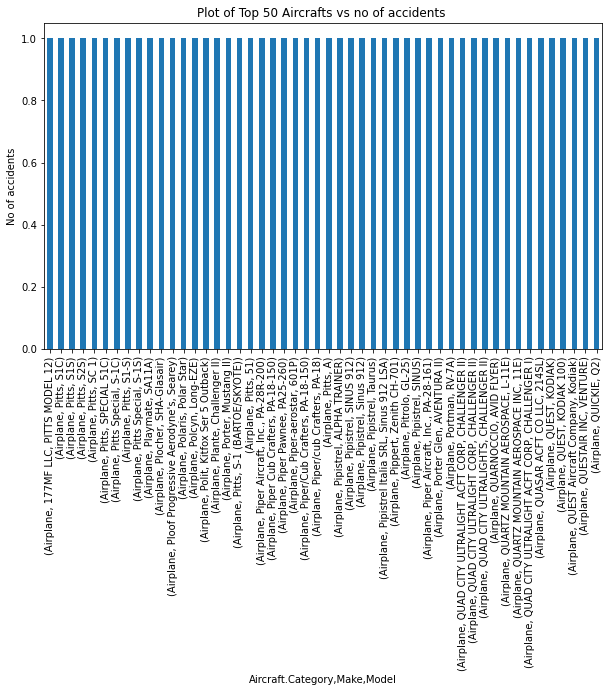

In [15]:
# Plotting the bar chart to visualize the data
ax = accidents.plot(kind='bar', figsize=(10, 6))
ax.set_title('Plot of Top 50 Aircrafts vs no of accidents ')
ax.set_ylabel('No of accidents');

## How aircrafts perform in different weather conditions

Different aircrafts perform differently in different weather conditions so checking to see how the aicrafts with lower accident frequencies perform in different weather conditions 

In [16]:
# Grouping by Weather Condition and Model to see how they perform in different weather conditions
weather = df.groupby(['Weather.Condition','Make','Model',])['Event.Id'].count().sort_values(ascending=True)
weather

Weather.Condition  Make            Model      
IMC                AERO COMMANDER  114B              1
VMC                Kolb Company    FIRESTAR II       1
                   Kolb            TWINSTAR          1
                                   Mark III          1
                                   Mark II           1
                                                  ... 
                   Cessna          150             691
                   Piper           PA-28-140       732
                   Cessna          172N            909
                                   172            1160
                                   152            2094
Name: Event.Id, Length: 21136, dtype: int64

In [17]:
# Identifying the top 20 models with high accidents counts
top_models = weather.groupby('Model').sum().nlargest(20).index
# Filtering the dataset to only include the top 20 models
filtered_weather = weather.loc[weather.index.get_level_values('Model').isin(top_models)]
# Reshaping the filtered dataset
weather_pivot = filtered_weather.unstack(level=0).fillna(0)

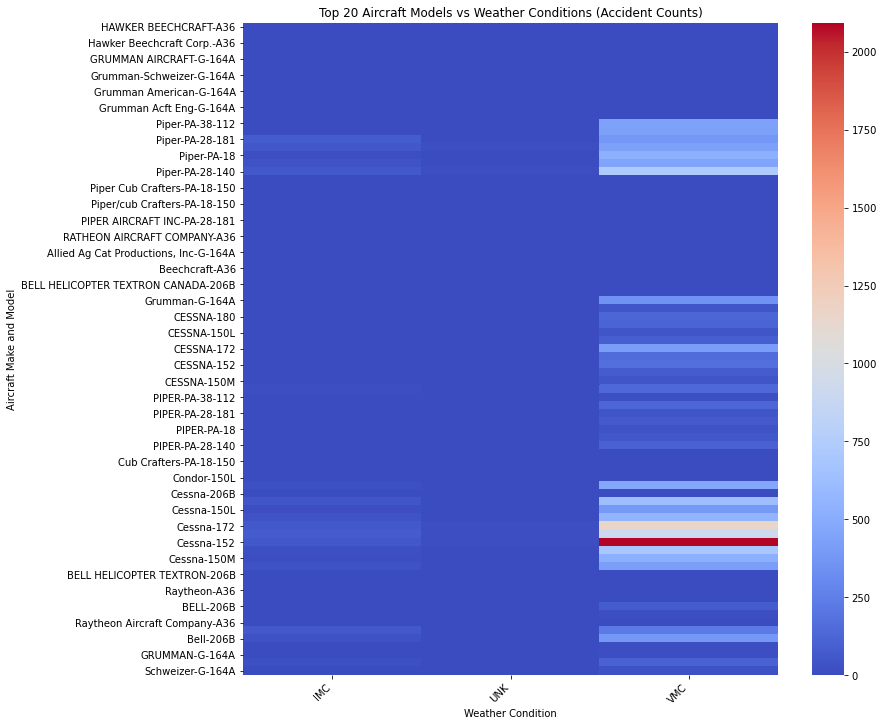

In [18]:
# Plotting a heatmap to visualize the data
plt.figure(figsize=(12, 12))
sns.heatmap(weather_pivot, cmap="coolwarm", annot=False, cbar=True)
# Setting the orientation of the ticks
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
# Creating the appropriate titles and labels
plt.title("Top 20 Aircraft Models vs Weather Conditions (Accident Counts)")
plt.xlabel("Weather Condition")
plt.ylabel("Aircraft Make and Model")
plt.show()

## Accidents by season

Accident vary by season, where some seasons accidents are more common

In [19]:
# Grouping by Season
seasonal_accidents = df.groupby('Season')['Event.Id'].count()
seasonal_accidents

Season
Fall      20844
Spring    22419
Summer    30208
Winter    15306
Name: Event.Id, dtype: int64

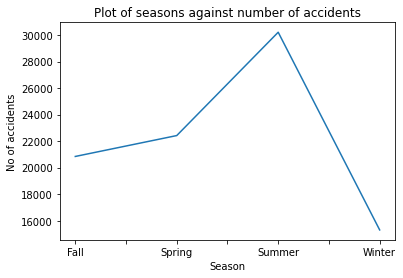

In [20]:
# Creating a plot of seasons against number of accidents
ax1 = seasonal_accidents.plot()
ax1.set_title('Plot of seasons against number of accidents')
ax1.set_ylabel('No of accidents');

## Accidents by month

Different months have different accident rates than others.

In [21]:
# Grouping by month
monthly_accidents = df.groupby('Month')['Event.Id'].count()
monthly_accidents

Month
April         7240
August        9971
December      5051
February      5275
January       4980
July         10686
June          9551
March         6674
May           8505
November      5530
October       6977
September     8337
Name: Event.Id, dtype: int64

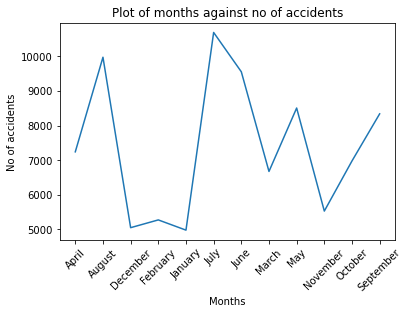

In [22]:
# Creating a plot of months against number of accidents
fig,ax = plt.subplots()
ax.plot(monthly_accidents)
# Setting appropriate labels and titles
ax.set_title('Plot of months against no of accidents')
ax.set_xlabel('Months')
ax.set_ylabel('No of accidents')
# Setting the ticks so as to orient the tick labels appropriately
ax.set_xticks(range(len(monthly_accidents)))
ax.set_xticklabels(monthly_accidents.index, rotation=45);

## Most common aircraft type damages

Some aircraft damages are more frequent than others

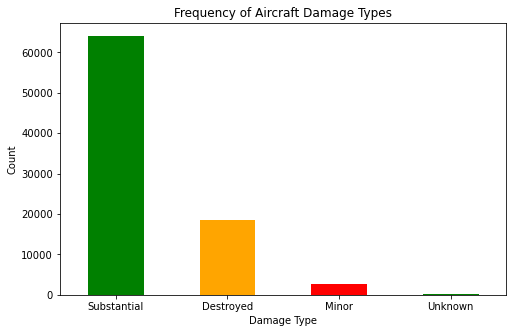

In [23]:
# Plotting the frequency of Aircraft damage types 
damage = df['Aircraft.damage'].value_counts()
damage.plot(kind='bar', color=['green', 'orange', 'red'], figsize=(8, 5))
plt.title("Frequency of Aircraft Damage Types")
plt.xlabel("Damage Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## Types of damages in different aircrafts 

Aircraft damages vary from aircraft to aircraft and depending on the accident itself

In [24]:
# Grouping by Aircraft category, Model and aircraft damage
damage_by_model = (df.groupby([ 'Aircraft.Category','Make','Model', 'Aircraft.damage'])['Event.Id'].count().unstack
                   (fill_value=0).sort_values(by='Destroyed', ascending=True))
print(damage_by_model.head(25))

Aircraft.damage                                              Destroyed  Minor  \
Aircraft.Category Make                 Model                                    
Airplane          177MF LLC            PITTS MODEL 12                0      0   
                  Progressive Aerodyne SEAREY                        0      0   
                  Probst               Baby Ace D                    0      0   
                  Price                Cuby Acro Trainer             0      0   
                  Presley              RV-4                          0      0   
                  Prendergast          RV-7A                         0      0   
                  Powrachute           PC 2000                       0      0   
                  Powell               Vans RV-6A                    0      0   
                  Potts                MA-5                          0      0   
                  Poser                DM 582 Buckeye                0      0   
                  Portman   

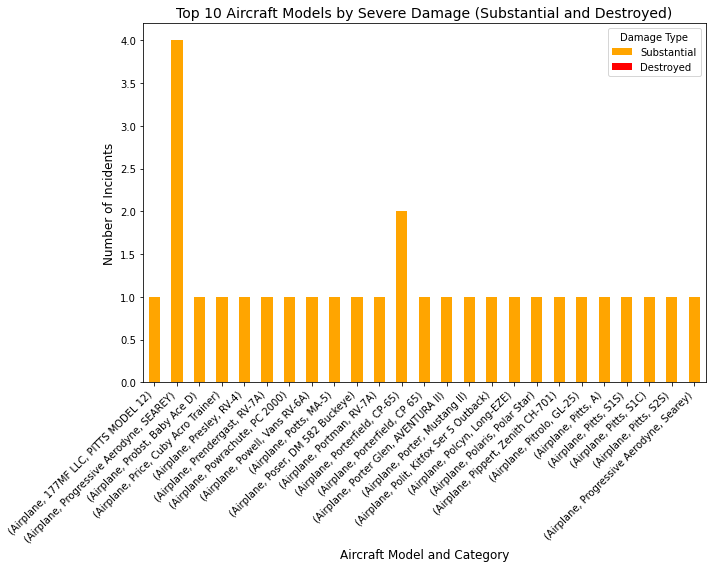

In [25]:
# Extracting the top 20 damages by model
top_damage_models = damage_by_model.head(25)

# Plotting the data
top_damage_models[['Substantial', 'Destroyed']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 8),
    color=['orange', 'red']
)

# Adding title and labels
plt.title('Top 10 Aircraft Models by Severe Damage (Substantial and Destroyed)', fontsize=14)
plt.xlabel('Aircraft Model and Category', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Damage Type')
plt.tight_layout()
plt.show()

## Type of damage depending on the weather Condition

Depending on the weather condition, the severity of the aircraft accident differs

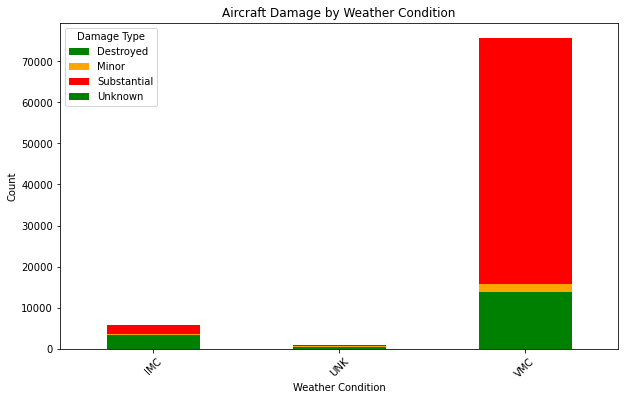

In [26]:
# Grouping by Weather condition and aircraft damage
damage_weather = df.groupby(['Weather.Condition', 'Aircraft.damage'])['Event.Id'].count().unstack(fill_value=0)
# Plotting the bar chart
damage_weather.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'orange', 'red'])
# Adding the appropriate labels and title
plt.title("Aircraft Damage by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Damage Type")
plt.show()

# Conclusions

This analysis leads to three recommendations for the company to consider: 

- Focus on acquiring aircraft models with a history of low accident frequency and high durability under diverse conditions.

- Prepare for and mitigate seasonal risks through strategic scheduling and enhanced training during high-risk months.

- Enhance safety protocols for flights during adverse weather to reduce the impact of severe damage and accidents.

# Next Steps

Further analyses could yield additional insights to help the company make the decision:

- **Predictive Modeling**: Use machine learning techniques to predict future accident rates based on historical data, weather conditions, and aircraft attributes.

- **Cost-Benefit Analysis**: Compare the cost of acquisition, maintenance, and potential accident-related costs for different aircraft models.

- **Seasonal Simulations**: Simulate accident scenarios under different seasonal and weather conditions to identify potential mitigation strategies.